#### Startup Transformation
In this project, you’ll work as a data analyst for a tech startup that is looking to improve its operations after a global pandemic has taken the world by storm.

You will apply data transformation techniques to make better sense of the company’s data and help answer important questions such as:

Is the company in good financial health?
Does the company need to let go of any employees?
Should the company allow employees to work from home permanently?

In [1]:
from sklearn import preprocessing
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
# load in financial data
financial_data = pd.read_csv('/Users/elorm/Documents/Repos/Datasets/financial_data.csv')

# code goes here
print(financial_data.head(3))

   Month  Revenue  Expenses
0      1  1420000    510000
1      2  1200000    532000
2      3  1050000    551000


In [3]:
financial_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Month     6 non-null      int64
 1   Revenue   6 non-null      int64
 2   Expenses  6 non-null      int64
dtypes: int64(3)
memory usage: 272.0 bytes


In [4]:
# Storing each column in three separate variables
month = financial_data['Month']
revenue = financial_data['Revenue']
expenses = financial_data['Expenses']

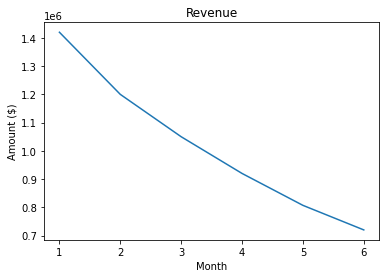

In [5]:
#plot of revenue over the past six months
plt.plot(month, revenue)
plt.xlabel('Month')
plt.ylabel('Amount ($)')
plt.title('Revenue')
plt.show()